We are going to forecast exchange rate using ARIMA model

In [1]:
import pandas as pd
import matplotlib as plot

In [3]:
exchange_rates = pd.read_csv('exchange.csv', header=0, parse_dates=[0], index_col=0)

In [4]:
exchange_rates.head()

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96


Let us view statistics of our dataset, by describing it

In [5]:
exchange_rates.describe()

,GBP/USD Close
count,5100.000000
mean,89.732223
std,63.037321
min,17.040000
25%,45.965000
50%,73.315500
75%,94.187500
max,250.280000


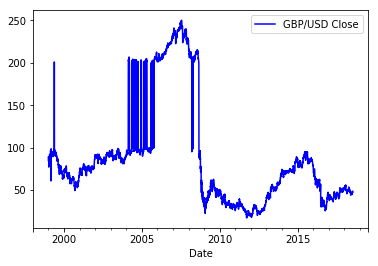

In [7]:
# Now we can plot the dataset by drawing a line graph

exchange_rates.plot(color='blue')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D2396C4A8>]],
      dtype=object)

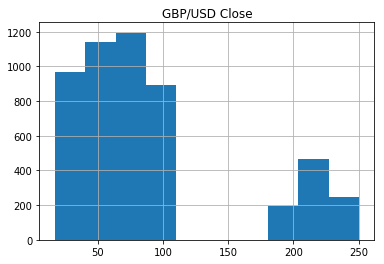

In [8]:
# we can even plot histogram of our data to gain insight of where major data distribution lays

exchange_rates.hist()

In [27]:
tot_datset = len(exchange_rates)
print(tot_datset)
er=exchange_rates.values

5100


Using this dataset we do, 70-30% split to train and test our model

In [28]:
TrainingSize = int(tot_datset * 0.7)
TrainingData = er[0:TrainingSize]
TestData = er[TrainingSize:tot_datset]

In [29]:
type(TrainingData)

numpy.ndarray

In [30]:
#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()

As we know, a regression model is not like classification model where you train a model once and reuse it on multiple similar domain datasets,so we train our model continuously on latest data and predict the next values:-

As we are using ARIMA model for forecasting, the p,d and q values are used by default for now, however I will be creating a seperate tutorial for selecting best p,d,q values

In [34]:
from statsmodels.tsa.arima_model import ARIMA


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    print(timepoint)
    ActualValue =  TestData[timepoint]
    print(ActualValue)
    #forcast value
    model = ARIMA(Actual, order=(3,1,0))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    print('Actual=%f, Predicted=%f' % (ActualValue, prediction))
    #add it in the list
    Predictions.append(prediction)
    Actual.append(ActualValue)

0
[25.703]
Actual=25.703000, Predicted=24.576409
1
[25.211]


C:\Users\sugat\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1333: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\sugat\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1336: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\sugat\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1342: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

Actual=25.211000, Predicted=25.332256
2
[25.11]
Actual=25.110000, Predicted=25.111074
3
[24.872]
Actual=24.872000, Predicted=25.226216
4
[25.363]
Actual=25.363000, Predicted=24.936629
5
[25.17]
Actual=25.170000, Predicted=25.239773
6
[27.179]
Actual=27.179000, Predicted=25.092937
7
[27.836]
Actual=27.836000, Predicted=26.591634
8
[27.985]
Actual=27.985000, Predicted=27.171863
9
[27.105]
Actual=27.105000, Predicted=27.780572
10
[26.92]
Actual=26.920000, Predicted=27.315175
11
[26.985]
Actual=26.985000, Predicted=27.143039
12
[26.249]
Actual=26.249000, Predicted=26.975671
13
[25.962]
Actual=25.962000, Predicted=26.429683
14
[25.566]
Actual=25.566000, Predicted=26.183523
15
[25.989]
Actual=25.989000, Predicted=25.718160
16
[25.758]
Actual=25.758000, Predicted=25.920293
17
[25.783]
Actual=25.783000, Predicted=25.706837
18
[26.084]
Actual=26.084000, Predicted=25.801637
19
[26.21]
Actual=26.210000, Predicted=25.960353
20
[27.01]
Actual=27.010000, Predicted=26.080075
21
[26.853]
Actual=26.853

Actual=53.221000, Predicted=51.855414
166
[51.895]
Actual=51.895000, Predicted=52.741267
167
[51.806]
Actual=51.806000, Predicted=51.992719
168
[51.45]
Actual=51.450000, Predicted=52.114334
169
[51.359]
Actual=51.359000, Predicted=51.555343
170
[52.15]
Actual=52.150000, Predicted=51.448849
171
[54.106]
Actual=54.106000, Predicted=51.915090
172
[54.432]
Actual=54.432000, Predicted=53.329266
173
[53.257]
Actual=53.257000, Predicted=53.896440
174
[53.73]
Actual=53.730000, Predicted=53.535345
175
[55.394]
Actual=55.394000, Predicted=53.831859
176
[56.03]
Actual=56.030000, Predicted=54.770010
177
[55.818]
Actual=55.818000, Predicted=55.463911
178
[55.72]
Actual=55.720000, Predicted=55.737944
179
[55.76]
Actual=55.760000, Predicted=55.785839
180
[56.194]
Actual=56.194000, Predicted=55.755194
181
[56.599]
Actual=56.599000, Predicted=56.041013
182
[56.18]
Actual=56.180000, Predicted=56.369488
183
[55.32]
Actual=55.320000, Predicted=56.206956
184
[54.58]
Actual=54.580000, Predicted=55.659482
18

Actual=67.860000, Predicted=68.867526
330
[68.835]
Actual=68.835000, Predicted=68.353859
331
[67.94]
Actual=67.940000, Predicted=68.782514
332
[67.93]
Actual=67.930000, Predicted=67.983060
333
[66.942]
Actual=66.942000, Predicted=68.125484
334
[70.138]
Actual=70.138000, Predicted=67.229177
335
[70.59]
Actual=70.590000, Predicted=69.383806
336
[70.027]
Actual=70.027000, Predicted=69.743828
337
[70.18]
Actual=70.180000, Predicted=70.106588
338
[70.607]
Actual=70.607000, Predicted=70.252131
339
[70.17]
Actual=70.170000, Predicted=70.435303
340
[71.94]
Actual=71.940000, Predicted=70.202128
341
[73.138]
Actual=73.138000, Predicted=71.497966
342
[73.432]
Actual=73.432000, Predicted=72.382340
343
[74.369]
Actual=74.369000, Predicted=73.084703
344
[74.19]
Actual=74.190000, Predicted=74.023023
345
[72.03]
Actual=72.030000, Predicted=74.035243
346
[71.917]
Actual=71.917000, Predicted=72.718241
347
[70.916]
Actual=70.916000, Predicted=72.415733
348
[71.47]
Actual=71.470000, Predicted=71.224876
34

Actual=72.874000, Predicted=72.961426
492
[73.009]
Actual=73.009000, Predicted=72.879782
493
[73.004]
Actual=73.004000, Predicted=72.974986
494
[73.915]
Actual=73.915000, Predicted=72.970060
495
[73.643]
Actual=73.643000, Predicted=73.637023
496
[72.586]
Actual=72.586000, Predicted=73.520491
497
[72.901]
Actual=72.901000, Predicted=72.962479
498
[73.162]
Actual=73.162000, Predicted=73.029921
499
[71.957]
Actual=71.957000, Predicted=73.003716
500
[71.738]
Actual=71.738000, Predicted=72.258453
501
[71.24]
Actual=71.240000, Predicted=72.062314
502
[71.606]
Actual=71.606000, Predicted=71.425518
503
[71.862]
Actual=71.862000, Predicted=71.597252
504
[70.98]
Actual=70.980000, Predicted=71.696382
505
[70.93]
Actual=70.930000, Predicted=71.185148
506
[70.849]
Actual=70.849000, Predicted=71.132541
507
[71.526]
Actual=71.526000, Predicted=70.873469
508
[70.994]
Actual=70.994000, Predicted=71.333317
509
[72.185]
Actual=72.185000, Predicted=70.999563
510
[72.138]
Actual=72.138000, Predicted=71.939

Actual=81.315000, Predicted=82.322168
655
[80.49]
Actual=80.490000, Predicted=81.867644
656
[78.975]
Actual=78.975000, Predicted=80.972201
657
[80.07]
Actual=80.070000, Predicted=79.602112
658
[78.918]
Actual=78.918000, Predicted=80.063943
659
[80.018]
Actual=80.018000, Predicted=79.014758
660
[77.84]
Actual=77.840000, Predicted=79.940912
661
[79.439]
Actual=79.439000, Predicted=78.245970
662
[79.134]
Actual=79.134000, Predicted=79.435412
663
[77.773]
Actual=77.773000, Predicted=78.862591
664
[77.734]
Actual=77.734000, Predicted=78.253568
665
[77.187]
Actual=77.187000, Predicted=78.037453
666
[77.18]
Actual=77.180000, Predicted=77.349323
667
[77.789]
Actual=77.789000, Predicted=77.297325
668
[77.983]
Actual=77.983000, Predicted=77.600715
669
[77.36]
Actual=77.360000, Predicted=77.788003
670
[77.454]
Actual=77.454000, Predicted=77.504380
671
[77.41]
Actual=77.410000, Predicted=77.558791
672
[77.918]
Actual=77.918000, Predicted=77.395711
673
[78.373]
Actual=78.373000, Predicted=77.771482

Actual=84.173000, Predicted=85.796355
819
[84.941]
Actual=84.941000, Predicted=84.694322
820
[85.494]
Actual=85.494000, Predicted=85.060215
821
[86.04]
Actual=86.040000, Predicted=85.150931
822
[86.176]
Actual=86.176000, Predicted=85.758405
823
[86.592]
Actual=86.592000, Predicted=86.018178
824
[86.99]
Actual=86.990000, Predicted=86.439484
825
[85.17]
Actual=85.170000, Predicted=86.779862
826
[85.4]
Actual=85.400000, Predicted=85.631647
827
[86.11]
Actual=86.110000, Predicted=85.728784
828
[86.24]
Actual=86.240000, Predicted=85.836196
829
[86.92]
Actual=86.920000, Predicted=86.046573
830
[86.688]
Actual=86.688000, Predicted=86.690354
831
[86.8]
Actual=86.800000, Predicted=86.609623
832
[87.345]
Actual=87.345000, Predicted=86.819921
833
[87.66]
Actual=87.660000, Predicted=87.155169
834
[88.215]
Actual=88.215000, Predicted=87.446798
835
[87.835]
Actual=87.835000, Predicted=87.982203
836
[86.64]
Actual=86.640000, Predicted=87.829741
837
[85.77]
Actual=85.770000, Predicted=87.084558
838
[8

C:\Users\sugat\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=59.520000, Predicted=58.513374
910
[61.223]
Actual=61.223000, Predicted=58.926510
911
[62.147]
Actual=62.147000, Predicted=60.578723
912
[61.66]
Actual=61.660000, Predicted=61.492642
913
[59.988]
Actual=59.988000, Predicted=61.605075
914
[61.067]
Actual=61.067000, Predicted=60.591966
915
[61.54]
Actual=61.540000, Predicted=61.095288
916
[63.66]
Actual=63.660000, Predicted=61.144886
917
[62.74]
Actual=62.740000, Predicted=62.917184
918
[60.08]
Actual=60.080000, Predicted=62.548459
919
[60.552]
Actual=60.552000, Predicted=61.081593
920
[61.542]
Actual=61.542000, Predicted=60.975586
921
[61.698]
Actual=61.698000, Predicted=61.118603
922
[60.87]
Actual=60.870000, Predicted=61.428925
923
[59.61]
Actual=59.610000, Predicted=61.080841
924
[58.67]
Actual=58.670000, Predicted=60.160284
925
[59.73]
Actual=59.730000, Predicted=59.212746
926
[59.795]
Actual=59.795000, Predicted=59.600040
927
[61.55]
Actual=61.550000, Predicted=59.529964
928
[62.07]
Actual=62.070000, Predicted=61.004985
929


Actual=26.949000, Predicted=26.601027
1072
[26.572]
Actual=26.572000, Predicted=27.014417
1073
[27.602]
Actual=27.602000, Predicted=26.660391
1074
[27.011]
Actual=27.011000, Predicted=27.355397
1075
[27.304]
Actual=27.304000, Predicted=26.942291
1076
[26.933]
Actual=26.933000, Predicted=27.330402
1077
[27.38]
Actual=27.380000, Predicted=26.957382
1078
[27.02]
Actual=27.020000, Predicted=27.308405
1079
[27.858]
Actual=27.858000, Predicted=27.008833
1080
[28.03]
Actual=28.030000, Predicted=27.667754
1081
[27.624]
Actual=27.624000, Predicted=27.774670
1082
[28.285]
Actual=28.285000, Predicted=27.693211
1083
[27.37]
Actual=27.370000, Predicted=28.156494
1084
[27.133]
Actual=27.133000, Predicted=27.478691
1085
[28.256]


C:\Users\sugat\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual=28.256000, Predicted=27.386770
1086
[28.991]
Actual=28.991000, Predicted=27.946280
1087
[29.622]
Actual=29.622000, Predicted=28.505863
1088
[30.186]
Actual=30.186000, Predicted=29.260032
1089
[31.594]
Actual=31.594000, Predicted=29.864817
1090
[34.263]
Actual=34.263000, Predicted=31.034180
1091
[34.551]
Actual=34.551000, Predicted=33.142076
1092
[35.404]
Actual=35.404000, Predicted=33.874649
1093
[36.047]
Actual=36.047000, Predicted=35.083069
1094
[35.763]
Actual=35.763000, Predicted=35.653407
1095
[36.54]
Actual=36.540000, Predicted=35.696034
1096
[36.902]
Actual=36.902000, Predicted=36.355518
1097
[38.76]
Actual=38.760000, Predicted=36.606346
1098
[37.996]
Actual=37.996000, Predicted=38.112408
1099
[40.037]
Actual=40.037000, Predicted=37.806887
1100
[41.02]
Actual=41.020000, Predicted=39.585656
1101
[41.008]
Actual=41.008000, Predicted=40.262099
1102
[39.288]
Actual=39.288000, Predicted=40.793839
1103
[40.431]
Actual=40.431000, Predicted=39.795888
1104
[42.954]
Actual=42.95400

Actual=41.470000, Predicted=39.639177
1246
[41.714]
Actual=41.714000, Predicted=41.063834
1247
[42.031]
Actual=42.031000, Predicted=41.260120
1248
[40.767]
Actual=40.767000, Predicted=41.877673
1249
[41.077]
Actual=41.077000, Predicted=41.063468
1250
[41.197]
Actual=41.197000, Predicted=41.245669
1251
[41.526]
Actual=41.526000, Predicted=41.071956
1252
[42.307]
Actual=42.307000, Predicted=41.388363
1253
[43.802]
Actual=43.802000, Predicted=41.987658
1254
[45.104]
Actual=45.104000, Predicted=43.172046
1255
[45.638]
Actual=45.638000, Predicted=44.379681
1256
[46.4]
Actual=46.400000, Predicted=45.189951
1257
[46.813]
Actual=46.813000, Predicted=46.049662
1258
[46.39]
Actual=46.390000, Predicted=46.513634
1259
[46.35]
Actual=46.350000, Predicted=46.418164
1260
[46.8]
Actual=46.800000, Predicted=46.443060
1261
[46.903]
Actual=46.903000, Predicted=46.658498
1262
[46.855]
Actual=46.855000, Predicted=46.761202
1263
[46.315]
Actual=46.315000, Predicted=46.836547
1264
[45.785]
Actual=45.785000, 

Actual=53.340000, Predicted=54.050258
1408
[53.82]
Actual=53.820000, Predicted=53.614278
1409
[54.99]
Actual=54.990000, Predicted=53.748300
1410
[55.99]
Actual=55.990000, Predicted=54.522823
1411
[55.74]
Actual=55.740000, Predicted=55.429100
1412
[52.44]
Actual=52.440000, Predicted=55.594365
1413
[52.76]
Actual=52.760000, Predicted=53.477852
1414
[51.96]
Actual=51.960000, Predicted=53.368758
1415
[51.11]
Actual=51.110000, Predicted=52.100837
1416
[50.42]
Actual=50.420000, Predicted=51.528981
1417
[50.31]
Actual=50.310000, Predicted=50.795442
1418
[49.43]
Actual=49.430000, Predicted=50.476588
1419
[49.98]
Actual=49.980000, Predicted=49.701958
1420
[49.54]
Actual=49.540000, Predicted=49.994121
1421
[49.]
Actual=49.000000, Predicted=49.535752
1422
[49.2]
Actual=49.200000, Predicted=49.248551
1423
[49.93]
Actual=49.930000, Predicted=49.243083
1424
[49.84]
Actual=49.840000, Predicted=49.653217
1425
[48.86]
Actual=48.860000, Predicted=49.697909
1426
[48.96]
Actual=48.960000, Predicted=49.165

Test Mean Squared Error (smaller the better fit): 1.551


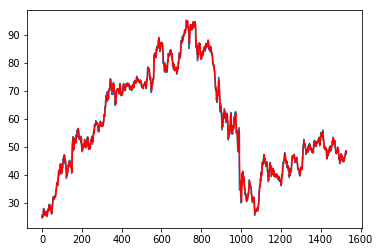

In [39]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
pyplot.plot(TestData)
pyplot.plot(Predictions, color='red')
pyplot.show()